In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns' , None)

In [3]:
df = pd.read_excel("Data_Train.xlsx")

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df[df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# df[df.Total_Stops == 'NaN']

In [10]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
33h 45m      1
3h 25m       1
35h 35m      1
5m           1
30h 15m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df['journey_day'] = pd.to_datetime(df.Date_of_Journey , format = "%d/%m/%Y").dt.day

In [14]:
df['journey_month'] = pd.to_datetime(df.Date_of_Journey , format = "%d/%m/%Y").dt.month

In [15]:
df.drop(columns = 'Date_of_Journey', inplace = True)

In [16]:
df['dep_hour'] = pd.to_datetime(df.Dep_Time ).dt.hour
df['dep_mins'] = pd.to_datetime(df.Dep_Time ).dt.minute

In [17]:
pd.to_datetime(df.Dep_Time )

0       2021-06-14 22:20:00
1       2021-06-14 05:50:00
2       2021-06-14 09:25:00
3       2021-06-14 18:05:00
4       2021-06-14 16:50:00
                ...        
10678   2021-06-14 19:55:00
10679   2021-06-14 20:45:00
10680   2021-06-14 08:20:00
10681   2021-06-14 11:30:00
10682   2021-06-14 10:55:00
Name: Dep_Time, Length: 10682, dtype: datetime64[ns]

In [18]:
df.drop('Dep_Time' , axis=1 , inplace = True)

In [19]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [20]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [24]:
pd.to_datetime(df['Arrival_Time']).dt

In [21]:
df.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [25]:
df['Arrival_mins'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [26]:
df.drop(columns = 'Arrival_Time', inplace = True)

In [27]:
 df.Duration[0].split()

['2h', '50m']

In [28]:
def duration(dur_string , h_m = 'h'):
    ds = dur_string.split()
    if True :
        if h_m == 'h':
            if 'h' in dur_string:
                return ds[0].split('h')[0]
            else:
                return 0
        else:
            if 'h' in dur_string:
                if 'm' in dur_string:
                    return ds[1].split('m')[0]
                else:
                    return 0
            else:
                return ds[0].split('m')[0]         

In [30]:
df['duration_hours'] = df['Duration'].apply(duration)
df['duration_mins'] = df['Duration'].apply(duration , h_m = 'm')

In [33]:
df['Duration'][0].split()[1].split('m')

['50', '']

In [34]:
df.drop(columns = 'Duration' , inplace = True)

In [35]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_mins,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [36]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
dep_hour            int64
dep_mins            int64
Arrival_hour        int64
Arrival_mins        int64
duration_hours     object
duration_mins      object
dtype: object

In [38]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [39]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

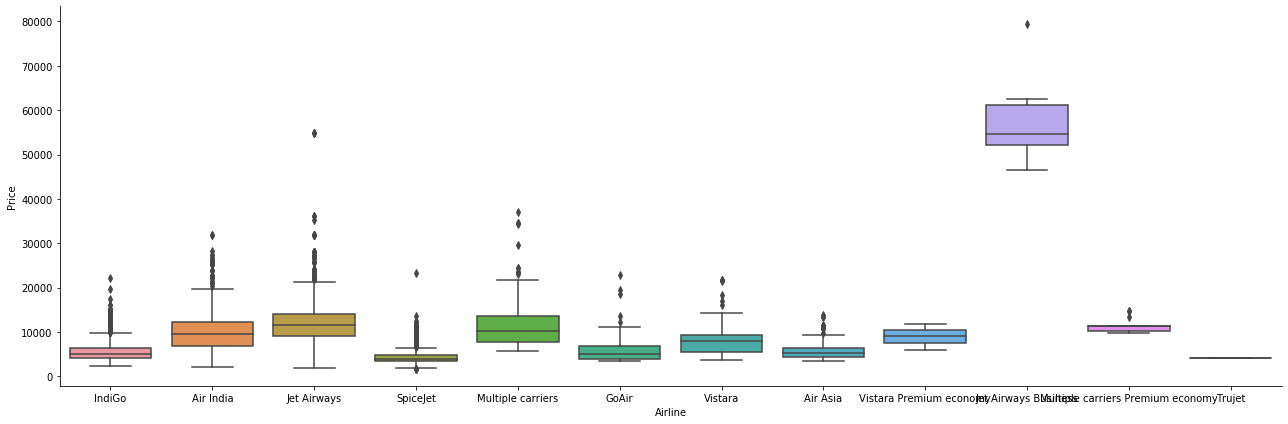

In [40]:
sns.catplot(y = 'Price' , x='Airline' , data = df, kind = 'box',height = 6 ,aspect = 3)

In [41]:
Air = df.Airline

In [42]:
Air = pd.get_dummies(Air , drop_first = True)

In [43]:
Air

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [44]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

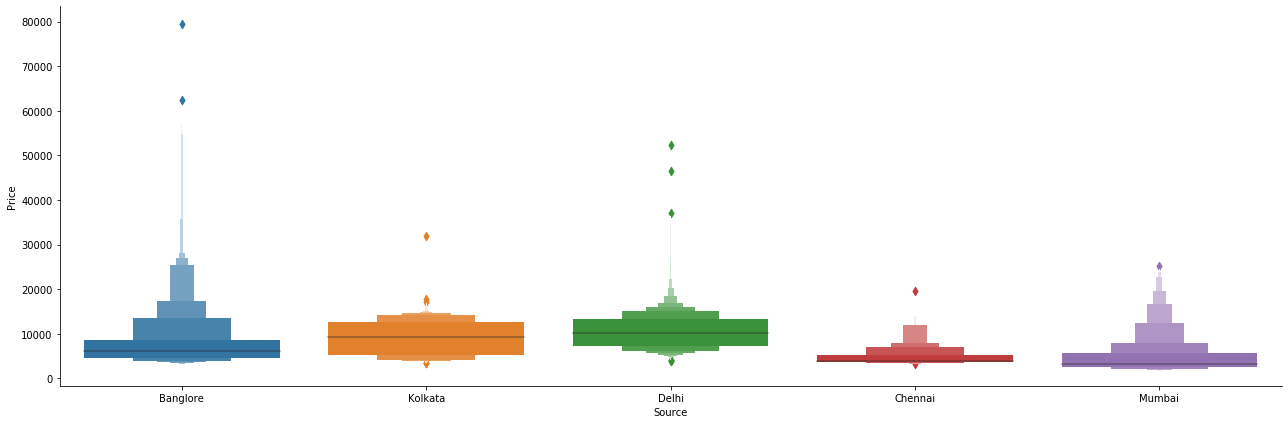

In [45]:
sns.catplot(y = 'Price' , x='Source' , data = df, kind = 'boxen',height = 6 ,aspect = 3)

In [46]:
source = pd.get_dummies(df.Source , drop_first = True , prefix= 'Source')

In [47]:
source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [48]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [49]:
destination = pd.get_dummies(df.Destination , drop_first = True , prefix = 'destination')

In [50]:
destination

,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [51]:
df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [52]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [53]:
df.drop(columns = ['Route' , 'Additional_Info'] , inplace = True)

In [54]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
df.replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'] , [0,2,1,3,4] , inplace = True)

In [56]:
df.drop(['Airline','Source','Destination'] , axis = 1 , inplace = True)

In [57]:
train = pd.concat([df , Air , source , destination] , axis =  1)

In [58]:
train

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_mins,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [89]:
train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_mins,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
train.shape

(10682, 30)

In [59]:
train.isnull().sum()

Total_Stops                          0
Price                                0
journey_day                          0
journey_month                        0
dep_hour                             0
dep_mins                             0
Arrival_hour                         0
Arrival_mins                         0
duration_hours                       0
duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
destination_Cochin       

In [63]:
train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_mins', 'Arrival_hour', 'Arrival_mins', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi'],
      dtype='object')

In [64]:
features = ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_mins', 'Arrival_hour', 'Arrival_mins', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi']

In [65]:
X = train.loc[: , ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_mins', 'Arrival_hour', 'Arrival_mins', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi']]

In [66]:
y = train.loc[: , 'Price']

In [67]:
X.isnull().sum()

Total_Stops                          0
journey_day                          0
journey_month                        0
dep_hour                             0
dep_mins                             0
Arrival_hour                         0
Arrival_mins                         0
duration_hours                       0
duration_mins                        0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
destination_Cochin                   0
destination_Delhi                    0
destination_Hyderabad    

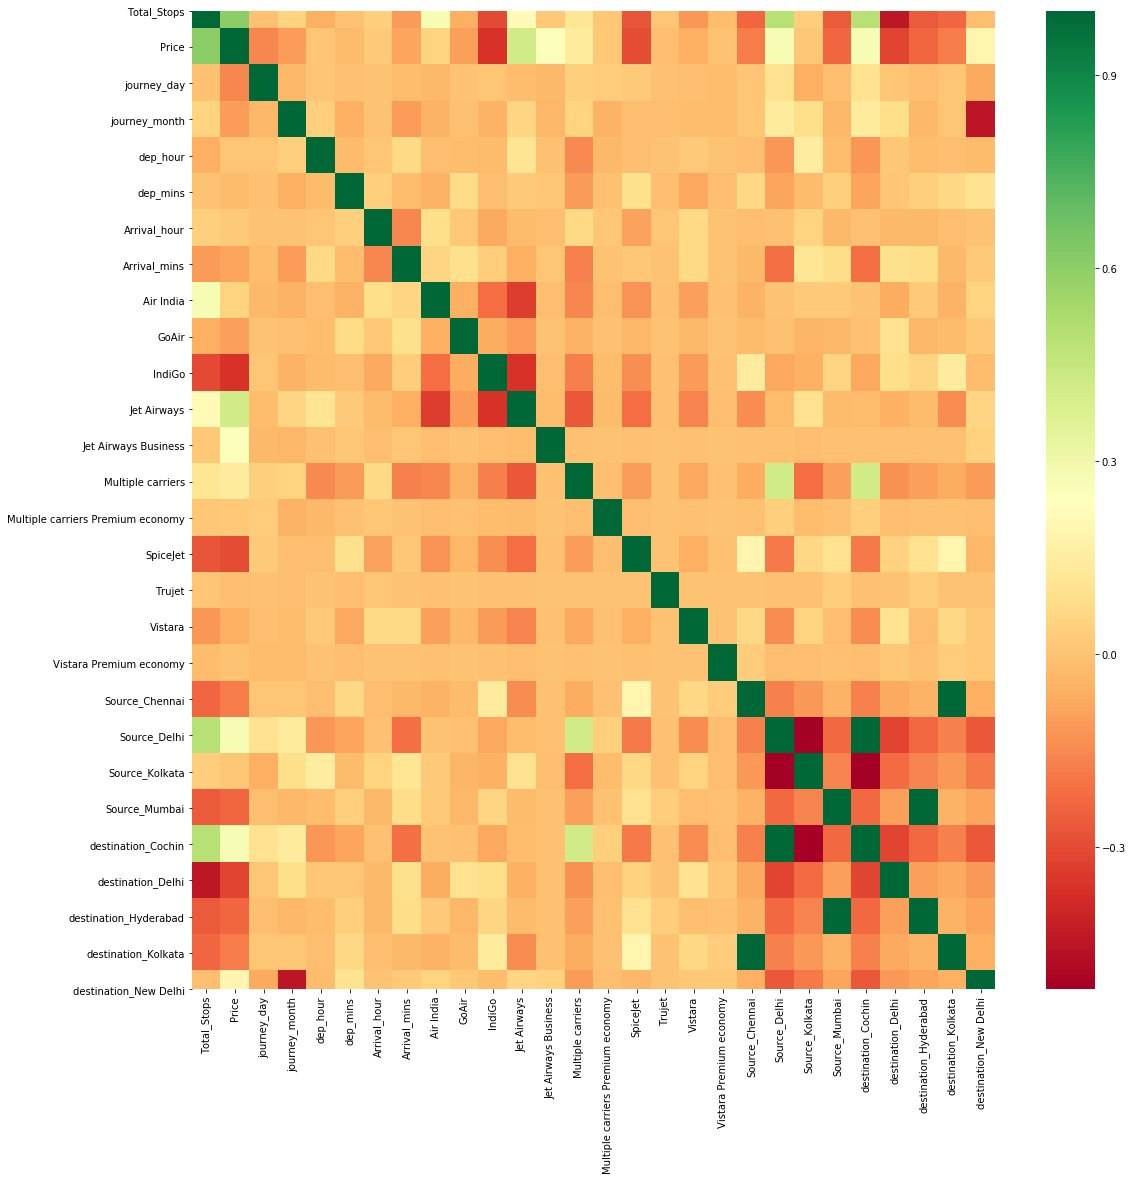

In [68]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), cmap = 'RdYlGn')
plt.show()

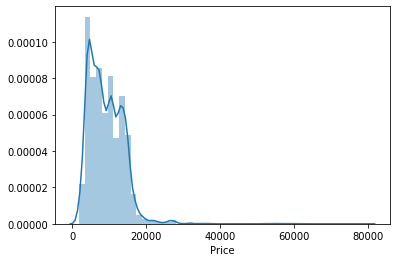

In [69]:
sns.distplot(y)

In [93]:
train.corr()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.036503,-0.008513,-0.006698,-0.003795,-0.013452,-0.003922,0.025754,-0.018229,0.009381,-0.034138,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.023661,0.014815,0.007456,-0.012743,-0.021628,0.008323,0.019015,-0.029597,0.006851,-0.028948,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,0.005070,0.017103,-0.014719,0.016887,0.024243,-0.028200,-0.006142,0.009650,0.004981,0.004738,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.030863,0.027194,-0.005779,-0.000669,0.018976,-0.018038,0.037714,-0.019198,-0.011875,0.007164,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,-0.014478,0.006411,0.037844,0.001858,0.020993,-0.017935,0.010243,-0.011878,-0.004311,-0.026374,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
dep_mins,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.000807,-0.010691,0.033079,-0.024856,-0.017721,-0.016033,0.006533,0.029616,-0.009056,-0.032282,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,-0.001306,-0.004773,-0.021285,0.002727,0.031152,0.004246,0.002169,0.024799,-0.008173,-0.016926,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_mins,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.021993,0.023790,0.007712,-0.006904,-0.024538,0.007020,-0.030059,0.019961,-0.013136,0.008715,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Air India,0.036503,0.023661,0.005070,0.030863,-0.014478,-0.000807,-0.001306,-0.021993,1.000000,-0.058788,-0.216003,-0.315788,-0.012157,-0.171602,-0.014892,-0.129055,-0.100042,-0.012157,0.030407,0.050391,-0.018949,-0.036140,0.050391,-0.015961,-0.036140,0.030407,-0.029753
GoAir,-0.008513,0.014815,0.017103,0.027194,0.006411,-0.010691,-0.004773,0.023790,-0.058788,1.000000,-0.064387,-0.094131,-0.003624,-0.051152,-0.004439,-0.038469,-0.029821,-0.003624,-0.025971,0.035484,-0.024617,0.014839,0.035484,0.011681,0.014839,-0.025971,-0.032211


In [70]:
from sklearn.ensemble import ExtraTreesRegressor

In [71]:
select = ExtraTreesRegressor()

In [72]:
select.fit(X , y)

ExtraTreesRegressor()

In [73]:
select.feature_importances_

array([2.31153014e-01, 1.43086106e-01, 5.38134678e-02, 2.48164079e-02,
       2.09236272e-02, 2.94114857e-02, 1.87514746e-02, 1.22820616e-01,
       1.77927110e-02, 9.38704477e-03, 1.79987609e-03, 1.64352498e-02,
       1.41141572e-01, 6.75269267e-02, 1.98331189e-02, 8.88133679e-04,
       3.04387855e-03, 5.14832854e-03, 7.98514620e-05, 6.09522798e-04,
       1.11106255e-02, 3.08374265e-03, 5.80944823e-03, 1.05558225e-02,
       1.08686748e-02, 4.86536216e-03, 4.39011446e-04, 2.48048992e-02])

In [74]:
feature_imp = pd.Series(select.feature_importances_ , index = features)

In [75]:
feature_imp.sort_values()

Vistara Premium economy              0.000080
destination_Kolkata                  0.000439
Source_Chennai                       0.000610
Multiple carriers Premium economy    0.000888
GoAir                                0.001800
SpiceJet                             0.003044
Source_Kolkata                       0.003084
destination_Hyderabad                0.004865
Vistara                              0.005148
Source_Mumbai                        0.005809
Air India                            0.009387
destination_Cochin                   0.010556
destination_Delhi                    0.010869
Source_Delhi                         0.011111
IndiGo                               0.016435
duration_mins                        0.017793
Arrival_mins                         0.018751
Multiple carriers                    0.019833
dep_mins                             0.020924
destination_New Delhi                0.024805
dep_hour                             0.024816
Arrival_hour                      

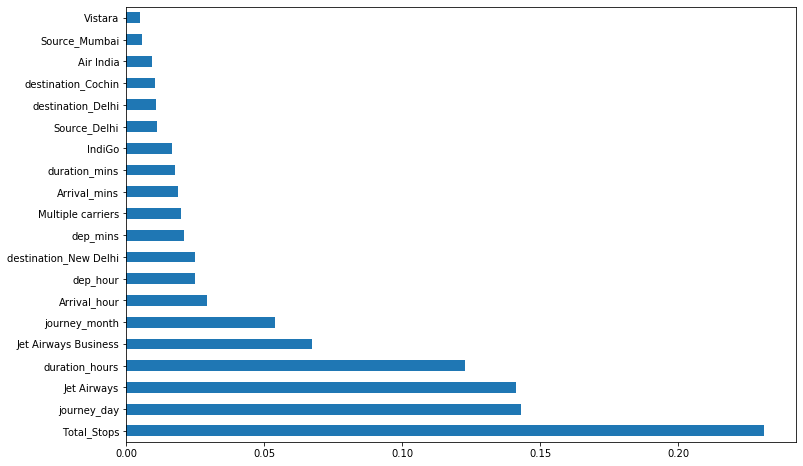

In [77]:
plt.figure(figsize = (12 , 8))
feature_imp.nlargest(20).plot(kind = 'barh')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = .2 , random_state = 1)

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfr_model = RandomForestRegressor()

In [81]:
rfr_model.fit(X_train , y_train)

RandomForestRegressor()

In [82]:
pred = rfr_model.predict(X_test)

In [83]:
rfr_model.score(X_train , y_train)

0.9551535532231711

In [84]:
rfr_model.score(X_test , y_test)

0.8070091876522982

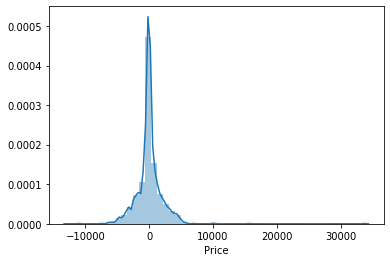

In [85]:
sns.distplot(y_test - pred) 

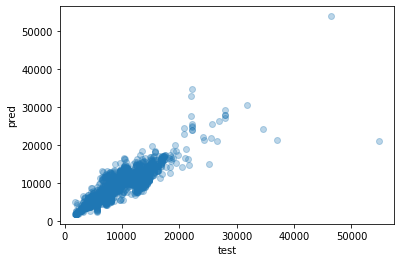

In [86]:
plt.scatter(y_test , pred ,alpha = .3)
plt.xlabel("test")
plt.ylabel("pred")
plt.show()

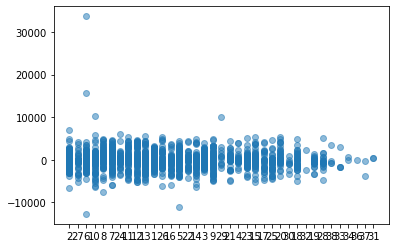

In [87]:
plt.scatter(X_test.duration_hours , y_test - pred , alpha = .5)

In [88]:
X_train

,Total_Stops,journey_day,journey_month,dep_hour,dep_mins,Arrival_hour,Arrival_mins,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
8201,1,24,4,20,25,1,30,5,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5398,1,27,6,12,50,21,0,8,10,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
9277,1,9,5,16,30,23,35,7,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1595,1,18,5,20,40,9,25,12,45,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8172,1,24,5,17,30,20,25,26,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,9,6,21,10,12,0,14,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7813,0,24,4,14,25,16,55,2,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
905,1,18,5,8,35,16,10,7,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5192,1,12,5,9,35,9,45,24,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
from sklearn import metrics

In [90]:
metrics.r2_score(y_test , pred)

0.8070091876522982

# hyperparameter tuning 

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimators = [int(x) for x in np.linspace(start =100 , stop = 1200 , num = 12)]

In [93]:
max_features = ['auto' , 'sqrt']

In [94]:
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

In [95]:
min_samples_split = [2 , 5 , 10 , 15 , 100]

In [96]:
min_samples_leaf = [1 , 2 , 5 , 10]

In [98]:
random_grid = {'n_estimators' : n_estimators,
                'max_features':max_features ,
                  'max_depth':max_depth ,
                  'min_samples_split':min_samples_split ,
                  'min_samples_leaf':min_samples_leaf }

In [99]:
rfr_random = RandomizedSearchCV(RandomForestRegressor() , param_distributions = random_grid, scoring = 'neg_mean_squared_error',\
                          verbose = 2 , random_state = 42)

In [100]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.7min finished


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
pd.DataFrame(rfr_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.023898,0.386119,0.201884,0.021408,900,5,5,sqrt,10,"{'n_estimators': 900, 'min_samples_split': 5, ...",-3.988200e+06,-7.059297e+06,-7.638558e+06,-4.434439e+06,-7.158852e+06,-6.055869e+06,1.525296e+06,8
1,7.072927,0.560191,0.348667,0.033790,1100,10,2,sqrt,15,"{'n_estimators': 1100, 'min_samples_split': 10...",-3.143965e+06,-5.100675e+06,-5.704159e+06,-3.578852e+06,-5.726675e+06,-4.650865e+06,1.085273e+06,5
2,4.146453,0.166729,0.115343,0.026325,300,100,5,auto,15,"{'n_estimators': 300, 'min_samples_split': 100...",-3.612983e+06,-6.757455e+06,-7.400833e+06,-3.789113e+06,-6.897121e+06,-5.691501e+06,1.640177e+06,7
3,7.710761,0.465223,0.115806,0.018587,400,5,5,auto,15,"{'n_estimators': 400, 'min_samples_split': 5, ...",-2.730378e+06,-5.450872e+06,-5.926781e+06,-2.965057e+06,-5.963449e+06,-4.607308e+06,1.449937e+06,4
4,10.637928,0.476053,0.191949,0.056994,700,5,10,auto,20,"{'n_estimators': 700, 'min_samples_split': 5, ...",-2.963718e+06,-6.126634e+06,-6.583413e+06,-3.260931e+06,-6.165553e+06,-5.020050e+06,1.568682e+06,6
5,10.743873,0.648921,0.470447,0.056115,1000,2,1,sqrt,25,"{'n_estimators': 1000, 'min_samples_split': 2,...",-3.164672e+06,-4.279240e+06,-4.588502e+06,-3.596122e+06,-5.512857e+06,-4.228279e+06,8.140493e+05,2
6,3.564821,0.351672,0.140112,0.014743,1100,15,10,sqrt,5,"{'n_estimators': 1100, 'min_samples_split': 15...",-6.384664e+06,-1.050496e+07,-1.086276e+07,-6.997611e+06,-9.868876e+06,-8.923775e+06,1.860658e+06,10
7,1.657252,0.066303,0.089425,0.017330,300,15,1,sqrt,15,"{'n_estimators': 300, 'min_samples_split': 15,...",-3.216216e+06,-4.621367e+06,-4.965665e+06,-3.596895e+06,-5.626277e+06,-4.405284e+06,8.853158e+05,3
8,2.309059,0.079931,0.106565,0.032831,700,10,2,sqrt,5,"{'n_estimators': 700, 'min_samples_split': 10,...",-6.567376e+06,-9.397781e+06,-9.707314e+06,-7.114947e+06,-9.425520e+06,-8.442588e+06,1.323415e+06,9
9,14.613114,1.334719,0.259807,0.041230,700,15,1,auto,20,"{'n_estimators': 700, 'min_samples_split': 15,...",-2.710930e+06,-4.770081e+06,-4.330693e+06,-2.930773e+06,-4.684073e+06,-3.885310e+06,8.842531e+05,1


In [102]:
rfr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [103]:
rfr_pred = rfr_random.predict(X_test)

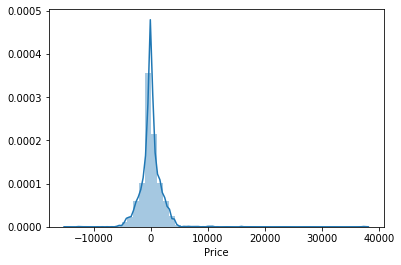

In [104]:
sns.distplot(y_test - rfr_pred , kde = True)
plt.show()

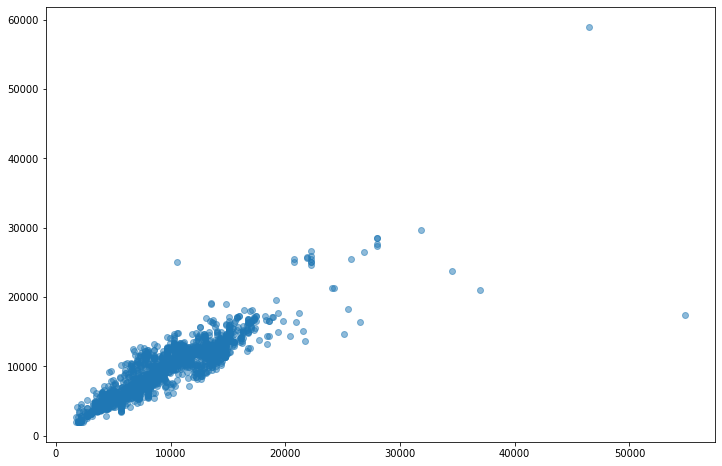

In [105]:
plt.figure(figsize = (12 , 8))
plt.scatter(y_test , rfr_pred , alpha = .5)

In [109]:
metrics.r2_score(y_train,rfr_random.predict(X_train) )

0.901293337108639

In [108]:
metrics.r2_score(y_test , rfr_pred)

0.8216037080370862

In [110]:
import pickle

In [111]:
file = open('flight_rf.pkl' , 'wb')

In [112]:
pickle.dump(rfr_random , file)

In [113]:
model = open('flight_rf.pkl' , 'rb')

In [114]:
forest = pickle.load(model)

In [115]:
y_pred = forest.predict(X_test)

In [117]:
metrics.r2_score(y_test , y_pred)

0.8216037080370862

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
LR = LinearRegression()

In [120]:
LR.fit(X_train, y_train)

LinearRegression()

In [121]:
LR.score(X_train , y_train)

0.6286817544121805

In [122]:
LR.score(X_test , y_test)

0.5997167293425787

In [123]:
from sklearn.linear_model import Lasso

In [124]:
ls = Lasso(alpha = .5,max_iter=500)

In [125]:
ls.fit(X_train , y_train)

Lasso(alpha=0.5, max_iter=500)

In [126]:
ls.score(X_train , y_train)

0.6286002659318264

In [127]:
ls.score(X_test , y_test)

0.6003528575276471

In [129]:
ls.coef_

array([ 2.72086963e+03, -7.65326744e+01, -4.42312034e+02,  1.74245668e+01,
       -1.39467722e+00, -1.35200188e+01,  1.96836865e+00,  2.15856818e+00,
       -1.13711900e+00,  1.62311033e+03, -0.00000000e+00,  1.67117683e+02,
        4.33679885e+03,  4.91406703e+04,  3.59999713e+03,  3.82554755e+03,
       -2.89309431e+02,  2.06512443e+03,  1.41142583e+03,  0.00000000e+00,
        1.39828445e+02, -0.00000000e+00, -1.54247258e+03,  0.00000000e+00,
       -8.67301622e+02, -1.09199679e+02,  1.37853299e+01,  1.70225077e+03])

In [135]:
X_test.to_csv('x_test.csv',index=False)

In [136]:
y_test.to_csv('y_test.csv',index=False,)

C:\Users\ravin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [130]:
from sklearn.ensemble import AdaBoostRegressor

In [131]:
model = AdaBoostRegressor(n_estimators=1,learning_rate=.7)

In [132]:
model.fit(X_train , y_train)

AdaBoostRegressor(learning_rate=0.7, n_estimators=1)

In [133]:
model.score(X_train , y_train)

0.5401604532230078

In [134]:
model.score(X_test , y_test)

0.5028887282936066